In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


In [ ]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Standardize the data (scale it)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reduce dimensions to 2D for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
# Linear Kernel
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train, y_train)

# RBF Kernel
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)


In [ ]:
# Accuracy Scores
acc_linear = accuracy_score(y_test, y_pred_linear)
acc_poly = accuracy_score(y_test, y_pred_poly)
acc_rbf = accuracy_score(y_test, y_pred_rbf)

print(f'Linear Kernel Accuracy: {acc_linear:.2f}')
print(f'Polynomial Kernel Accuracy: {acc_poly:.2f}')
print(f'RBF Kernel Accuracy: {acc_rbf:.2f}')


Linear Kernel Accuracy: 0.98
Polynomial Kernel Accuracy: 0.96
RBF Kernel Accuracy: 1.00


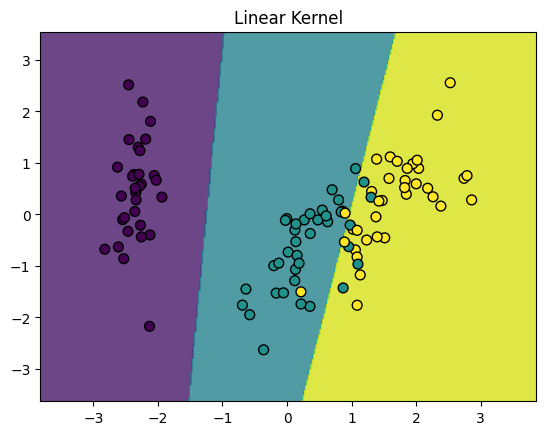

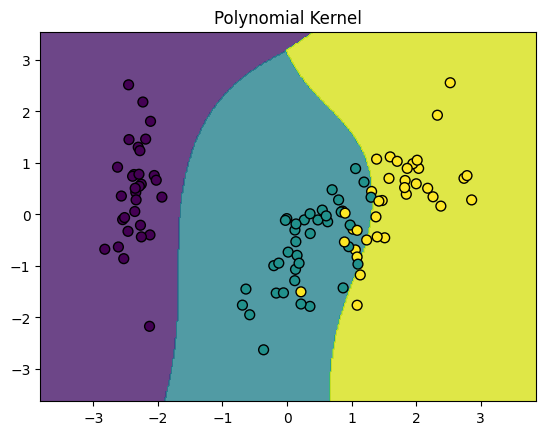

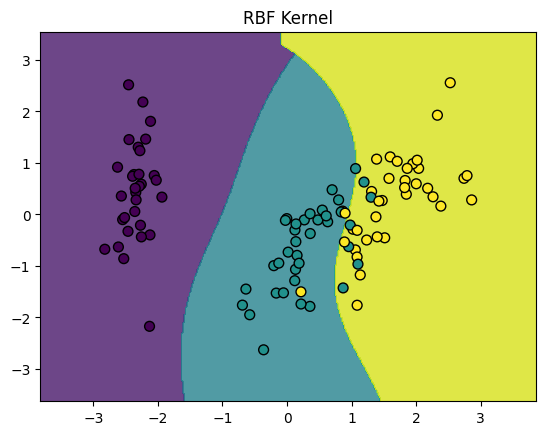

In [ ]:
# Train SVM models on PCA-transformed data
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_pca, y_train)

svm_poly = SVC(kernel='poly', degree=3, random_state=42)
svm_poly.fit(X_train_pca, y_train)

svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_pca, y_train)

# Function to plot decision boundaries (same as before)
def plot_decision_boundary(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Create the grid of points (xx, yy) and flatten it for prediction
    grid_points = np.c_[xx.ravel(), yy.ravel()]

    # Predict for each point in the grid
    Z = model.predict(grid_points)

    # Reshape Z back to the shape of the meshgrid
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and scatter points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
    plt.title(title)
    plt.show()

# Plot decision boundaries for different kernels
plot_decision_boundary(X_train_pca, y_train, svm_linear, 'Linear Kernel')
plot_decision_boundary(X_train_pca, y_train, svm_poly, 'Polynomial Kernel')
plot_decision_boundary(X_train_pca, y_train, svm_rbf, 'RBF Kernel')


